# **Introduction**

This guide follows the same format as [quickstart](00-quickstart.ipynb) but explores further functionality provided by twinLab. In this jupyter notebook we will:

1. Upload a dataset to twinLab.
2. List, view and query uploaded datasets.
3. Use `tl.train_campaign` to create a surrogate model.
4. List, view and query trained campaigns.
5. Use the model to make a prediction with `tl.predict_campaign`.
6. Visualise the results and their uncertainty.
7. Verify the model using `tl.sample_campaign`.


In [1]:
# Standard imports
from pprint import pprint

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Project imports
import twinlab as tl


         === TwinLab Client Initialisation ===
         Version  : 1.5.0
         User     : alexander
         Credits  : 1000
         Server   : https://twinlab.digilab.co.uk
         Key      : dg4Je8SwoFZ-o_KdVOpvkg



### **Your twinLab information**

Confirm your twinLab version


In [2]:
tl.get_versions()

{'cloud': '2.0.0',
 'modal': '0.2.0',
 'library': '1.2.0',
 'image': 'twinlab-prod'}

And view your user information, including how many credits you have.


In [3]:
tl.get_user_information()

{'username': 'alexander', 'credits': 1000}

### **Upload a dataset**

Datasets must be data presented as a `pandas.DataFrame` object, or a filepaths which points to a csv file that can be parsed to a `pandas.DataFrame` object. **Both must be formatted with clearly labelled columns.** Here, we will label the input (predictor) variable `x` and the output variable `y`. In `twinlab`, data is expected to be in column-feature format, meaning each row represents a single data sample, and each column represents a data feature.

Datasets must be uploaded with a `dataset_id` which is used to access them from the cloud.


In [4]:
x = [
    0.6964691855978616,
    0.28613933495037946,
    0.2268514535642031,
    0.5513147690828912,
    0.7194689697855631,
    0.42310646012446096,
    0.9807641983846155,
    0.6848297385848633,
    0.48093190148436094,
    0.3921175181941505,
]

y = [
    -0.8173739564129022,
    0.8876561174050408,
    0.921552660721474,
    -0.3263338765412979,
    -0.8325176123242133,
    0.4006686354731812,
    -0.16496626502368078,
    -0.9607643657025954,
    0.3401149876855609,
    0.8457949914442409,
]

# Creating the dataframe using the above arrays
df = pd.DataFrame({"x": x, "y": y})

# View the dataset before uploading
display(df)

# Define the name of the dataset
dataset_id = "example_data"

# Upload the dataset
tl.upload_dataset(df, dataset_id, verbose=True)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Dataframe is uploading.
Processing dataset.
Dataset example_data was processed.


If your data is stored in a csv file the you must input the filepath string into `tl.upload_dataset`.


In [5]:
# Specify the path to the dataset
df_filepath = "./resources/datasets/example_data.csv"

# Define the name of the dataset
dataset_id = "example_data"

# Upload the dataset to the cloud
tl.upload_dataset(df_filepath, dataset_id, verbose=True)

File ./resources/datasets/example_data.csv is uploading.
Processing dataset.
Dataset example_data was processed.


### **View datasets**

Once a dataset has been uploaded it can be easily accessed using built in twinLab functions. A list of all uploaded dataset can be produced, individual datasets can be viewed and you can even query a dataset to get a statistical summary of its data.


In [6]:
# List all datasets on cloud
tl.list_datasets()

['ObsNoise_Data',
 'data-error',
 'basic',
 'quadratic',
 'example_data',
 'Training_Data',
 'my_dataset',
 'fullmatrix.csv',
 'full-matrix-stdv',
 'ObsNoise_STD_Data',
 'inverse-methods',
 'data-error-std',
 'FunctionalGP_Data']

In [7]:
# View the dataset
tl.view_dataset(dataset_id)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


In [8]:
# Query the dataset to get a statistical summary
tl.query_dataset(dataset_id)

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### **Train a campaign**

The `campaign` class is used to train and implement your surrogate models. As with datasets, an id is defined, this is what the model will be saved as in the cloud. When training a model the arguments are passed using a dictionary; here we name that dictionary `campaign_params`. To train the model we use the `tl.train_campaign` function, inputting the dictionary and `campaign_id`.


In [9]:
# Name the campaign to be stored on the cloud
campaign_id = "example_campaign"

campaign_params = {
    "dataset_id": dataset_id,  # This points the campaign to the uploaded dataset
    "inputs": ["x"],
    "outputs": ["y"],
    "test_train_ratio": 1., # Use all the data for training
}

# Start a new campaign and train a surrogate model
tl.train_campaign(campaign_params, campaign_id, verbose=True)

Model example_campaign has begun training.


### **View campaigns**

Just as with datasets all saved campaigns can be listed and queried.


In [10]:
# List campaigns
tl.list_campaigns()

['FunctionalGP',
 'universe',
 'data-error',
 'example_campaign',
 'basic',
 'HomoskedasticGP',
 'BasicGP',
 'FidelityGP',
 'my_campaign',
 'full-matrix-holdout',
 'inverse-methods',
 'quadratic',
 'fullmatrix']

In [11]:
# View a campaigns parameters
tl.view_campaign(campaign_id)

{'id': 'example_campaign',
 'dataset_id': 'example_data',
 'inputs': ['x'],
 'outputs': ['y'],
 'train_test_ratio': 1.0,
 'modal_handle': 'fc-NDnO20ZKTCpzTqZnxLKrP5'}

In [12]:
# View the status of a campaign
pprint(tl.query_campaign(campaign_id))

{'model_summary': {'data_diagnostics': {'inputs': {'x': {'25%': 0.39986475367672814,
                                                         '50%': 0.5161233352836261,
                                                         '75%': 0.693559323844612,
                                                         'count': 10.0,
                                                         'max': 0.9807641983846156,
                                                         'mean': 0.544199352975335,
                                                         'min': 0.2268514535642031,
                                                         'std': 0.22935216613691597}},
                                        'outputs': {'y': {'25%': -0.6946139364450011,
                                                          '50%': 0.0875743613309401,
                                                          '75%': 0.7345134024514759,
                                                          'count': 10.0,
        

### **Using a predict campaign**

The surrogate model is now trained and saved to the cloud under the `campaign_id`. It can now be used to make predictions. First define a dataset of inputs for which you want to find outputs; ensure that this is a `pandas.DataFrame` object or a file path for a correctly formatted csv. Then call `tl.predict_campaign` with the keyword arguments being the evaluation dataset and the `campaign_id` of the model you wish to use.


In [13]:
# Define the inputs for the dataset
x_eval = np.linspace(0, 1, 128)

# Convert to a dataframe
df_eval = pd.DataFrame({"x": x_eval})
display(df_eval)

# Predict the results
df_mean, df_std = tl.predict_campaign(df_eval, campaign_id)

,x
0,0.000000
1,0.007874
2,0.015748
3,0.023622
4,0.031496
...,...
123,0.968504
124,0.976378
125,0.984252
126,0.992126


Alternatively the dataset can be used directly from a csv by inputting its filepath.


In [14]:
# The define the file path of the csv
df_eval_filepath = "./resources/datasets/example_eval.csv"

# Predict the results
df_mean, df_std = tl.predict_campaign(df_eval_filepath, campaign_id)

### **Viewing the results**

`tl.predict_campaign` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results.


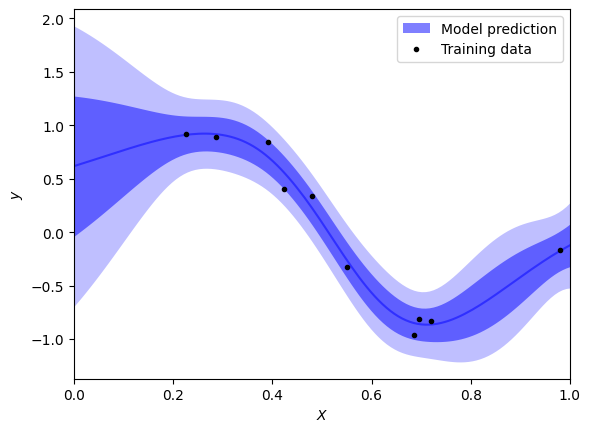

In [15]:
# Plot parameters
nsigs = [1, 2]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(
            grid,
            mean - nsig * err,
            mean + nsig * err,
            lw=0,
            color=color,
            alpha=alpha / (isig + 1),
        )
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="black", label="Training data")
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Sampling from a campaign**

The `tl.sample_campaign` function can be used to retrieve a number of results from your model. It requires the inputs for which you want the values and how many outputs to calculate for each.


In [16]:
# Define the sample inputs
sample_inputs = pd.DataFrame({"x": np.linspace(0, 1, 128)})

# Define number of samples to calculate for each input
num_samples = 100

# Calculate the samples using twinLab
sample_result = tl.sample_campaign(sample_inputs, campaign_id, num_samples)

# View the results in the form of a dataframe
display(sample_result)

y                                                              \
            0         1         2         3         4         5         6   
0    1.181244  0.923629  0.221997  1.487131  0.221709  1.130938  0.093277   
1    1.160330  0.900217  0.259028  1.504031  0.245082  1.080110  0.147777   
2    1.141457  0.880425  0.297606  1.522781  0.269858  1.036066  0.201844   
3    1.124247  0.862039  0.336531  1.543657  0.296524  0.998175  0.254790   
4    1.108249  0.843900  0.374859  1.566288  0.324010  0.965706  0.305801   
..        ...       ...       ...       ...       ...       ...       ...   
123 -0.494285 -0.138373 -0.001609 -0.021900 -0.172614 -0.276818 -0.221500   
124 -0.455086 -0.092246  0.012706  0.023561 -0.135239 -0.283239 -0.163313   
125 -0.420307 -0.044538  0.025403  0.069412 -0.096387 -0.288052 -0.104440   
126 -0.389387  0.005818  0.035785  0.116021 -0.057971 -0.291666 -0.044148   
127 -0.361823  0.059496  0.041779  0.163041 -0.020947 -0.294515  0.018073   

                                   ...                                \
            7         8         9  ...        90        91        92   
0    0.536508  0.730423  1.118380  ... -0.137614  0.981547  0.398384   
1    0.541413  0.775067  1.132432  ... -0.140259  0.965802  0.408272   
2    0.549524  0.816678  1.147874  ... -0.135830  0.949614  0.421399   
3    0.560502  0.854291  1.164256  ... -0.123660  0.931838  0.435783   
4    0.572996  0.887895  1.181165  ... -0.105088  0.913137  0.448355   
..        ...       ...       ...  ...       ...       ...       ...   
123 -0.154316 -0.237470 -0.352907  ... -0.232490 -0.105692 -0.359487   
124 -0.133085 -0.170846 -0.340365  ... -0.202648 -0.076163 -0.350853   
125 -0.113698 -0.104098 -0.332750  ... -0.173534 -0.047902 -0.340650   
126 -0.095713 -0.038647 -0.331543  ... -0.145420 -0.021198 -0.330147   
127 -0.080576  0.025714 -0.336196  ... -0.117226  0.004240 -0.319404   

                                                                           
           93        94        95        96        97        98        99  
0    0.459348  1.264529  0.706674  0.260233  0.942615 -0.336792 -0.057059  
1    0.497625  1.259236  0.718497  0.273393  0.938323 -0.306862 -0.002447  
2    0.534010  1.254815  0.727530  0.287758  0.937988 -0.275631  0.055941  
3    0.568605  1.253318  0.734441  0.303167  0.941832 -0.243327  0.116559  
4    0.600864  1.254457  0.740068  0.320612  0.949434 -0.209514  0.178120  
..        ...       ...       ...       ...       ...       ...       ...  
123 -0.204248 -0.000387 -0.330982 -0.177405 -0.163633 -0.287260 -0.232377  
124 -0.208134  0.009456 -0.300923 -0.169605 -0.145710 -0.282167 -0.260641  
125 -0.215749  0.017401 -0.271392 -0.161329 -0.129751 -0.279868 -0.291558  
126 -0.227620  0.021392 -0.243179 -0.153660 -0.116792 -0.279745 -0.325065  
127 -0.243583  0.019435 -0.216126 -0.146767 -0.106800 -0.280645 -0.361728  

[128 rows x 100 columns]

### **Viewing the results**

The results can be plotted over the top of the previous graph giving a nice visualisation of the sampled data, with the model's uncertainity.


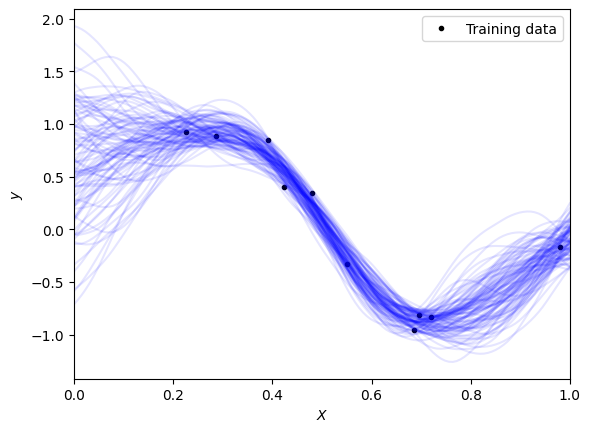

In [17]:
# Plot parameters
color_curve = "blue"
alpha_curve = 0.10
color_data = "black"
plot_training_data = True
plot_model_bands = False

# Plot samples drawn from the model
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color=color_data, label="Training data")
plt.plot(sample_inputs, sample_result["y"], color=color_curve, alpha=alpha_curve)
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Deleteing datasets and campaigns**

To keep your cloud storage tidy you should delete your datasets and campaigns when you are finished with them. `tl.delete_campaign` and `tl.delete_dataset` only deletes them from the cloud storage.


In [18]:
# Delete dataset
tl.delete_dataset(dataset_id)

# Delete campaign
tl.delete_campaign(campaign_id)